Model: Decision Tree
Accuracy: 0.9955
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6379
           1       1.00      1.00      1.00      7091

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470




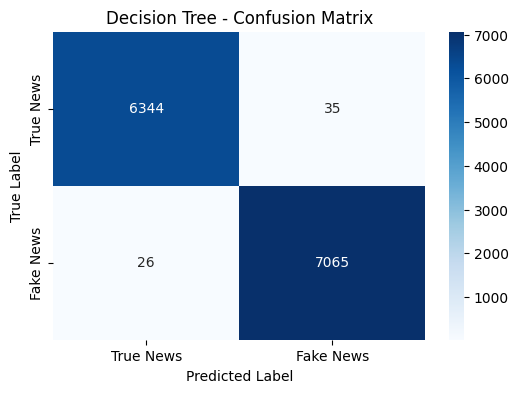

Model: Random Forest
Accuracy: 0.9878
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6379
           1       0.99      0.99      0.99      7091

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470




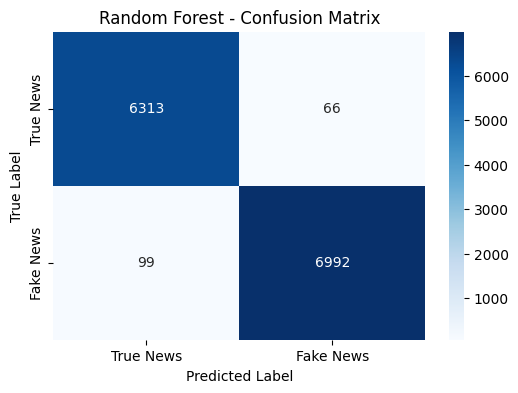

Model: Gradient Boosting
Accuracy: 0.9953
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6379
           1       1.00      0.99      1.00      7091

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470




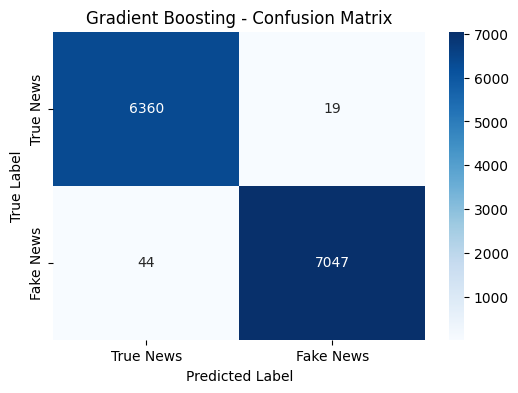

Model: Support Vector Machine
Accuracy: 0.9926
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6379
           1       0.99      0.99      0.99      7091

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470




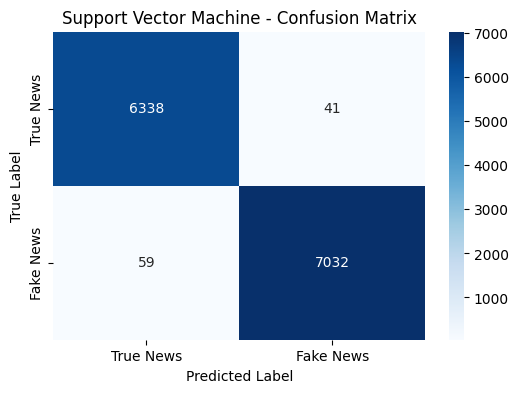

C:\Users\SUBHADEEP PAUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.9973
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6379
           1       1.00      1.00      1.00      7091

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470




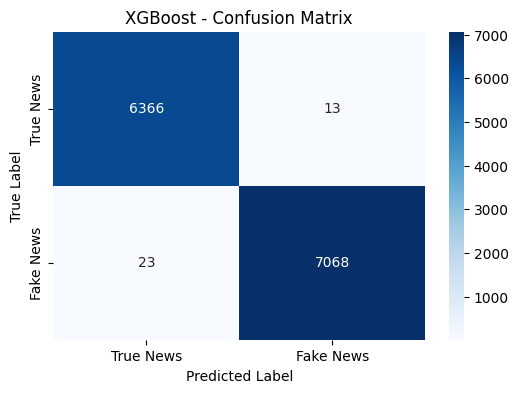

Decision Tree Accuracy: 0.9955
Random Forest Accuracy: 0.9878
Gradient Boosting Accuracy: 0.9953
Support Vector Machine Accuracy: 0.9926
XGBoost Accuracy: 0.9973


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

# Label the datasets: 1 for fake news, 0 for true news
fake_data['label'] = 1
true_data['label'] = 0

# Combine the datasets
combined_data = pd.concat([fake_data, true_data], ignore_index=True)

# Preprocess text data (using the 'text' column as input feature and 'label' as the target variable)
X = combined_data['text']
y = combined_data['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results[model_name] = {"accuracy": accuracy, "conf_matrix": conf_matrix, "class_report": class_report}
    print(f"Model: {model_name}\nAccuracy: {accuracy:.4f}\nClassification Report:\n{class_report}\n")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["True News", "Fake News"], yticklabels=["True News", "Fake News"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig('confusion_matrices.png', format='png')
    plt.show()

# Print summary of accuracies
for model_name, result in results.items():
    print(f"{model_name} Accuracy: {result['accuracy']:.4f}")


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the datasets
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

# Label the datasets: 1 for fake news, 0 for true news
fake_data['label'] = 1
true_data['label'] = 0

# Combine the datasets
combined_data = pd.concat([fake_data, true_data], ignore_index=True)

# Preprocess text data (using the 'text' column as input feature and 'label' as the target variable)
X = combined_data['text']
y = combined_data['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
best_model = None
best_accuracy = 0
results = {}

for model_name, model in models.items():
    #Train the model
    model.fit(X_train_tfidf, y_train)
    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Output the best model
print(f"\nBest Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy:.4f}")

# Define a function for predictions using the best model
def predict_news(article):
    # Transform the input article using the trained TF-IDF vectorizer
    article_tfidf = vectorizer.transform([article])
    # Predict with the best model
    prediction = best_model.predict(article_tfidf)
    # Output the result
    return "Fake News" if prediction[0] == 1 else "True News"

# Test the function
article = input("Enter the news article text: ")
result = predict_news(article)
print(f"The article is classified as: {result}")


Decision Tree Accuracy: 0.9944
Random Forest Accuracy: 0.9882
Gradient Boosting Accuracy: 0.9952
Support Vector Machine Accuracy: 0.9926


C:\Users\SUBHADEEP PAUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9973

Best Model: XGBClassifier with Accuracy: 0.9973


Enter the news article text:   	text 588	WASHINGTON (Reuters) - The top U.S. nuclear commander said on Saturday that he would resist President Donald Trump if he ordered an “illegal” launch of nuclear weapons. Air Force General John Hyten, commander of the U.S. Strategic Command (STRATCOM), told an audience at the Halifax International Security Forum in Nova Scotia, Canada that he had given a lot of thought to what he would say if he received such an order. “I think some people think we’re stupid,” Hyten said in response to a question about such a scenario. “We’re not stupid people. We think about these things a lot. When you have this responsibility, how do you not think about it?” Hyten, who is responsible for overseeing the U.S. nuclear arsenal, explained the process that would follow such a command.  As head of STRATCOM “I provide advice to the president, he will tell me what to do,” he said in his remarks, retransmitted in a video posted on the forum’s Facebook page.  “And if it’s

The article is classified as: True News
